## Linear Regression - House Sales in USA

In [3]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
#import the dataset and read its first five elements.

df = pd.read_csv('kc-house-data2.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
#to find no of rows and columns
df.shape

(21613, 21)

In [6]:
#getting certain information about the columns in dataset like non-null count and datatype.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [7]:
#description of the data in a column in the DataFrame like average, count etc.
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [8]:
#date column cannot be put in the model. so extracting year month and day from date column and dropping it

df['day'] = pd.DatetimeIndex(df['date']).day
df['month'] = pd.DatetimeIndex(df['date']).month
df['year'] = pd.DatetimeIndex(df['date']).year

df.drop(['date'], axis=1,inplace=True)

In [9]:
#to check if there are any missing values in the dataset.
df.isnull().any()

id               False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
day              False
month            False
year             False
dtype: bool

### EDA

In [ ]:
sns.pairplot(df)

In [ ]:
sns.distplot(df['price'])

In [ ]:
#correlation matrix - a table which displays the correlation coefficients for different variables/columns
# correlation factor close to 1 means highly corelated (very similar)
# correlation factor close to 0 means not very corelated (very different)
sns.heatmap(df.corr(),annot=True)

### Linear Regression

##### STEP 1} Create X and Y data 

In [10]:
# x -- contains features to train on (LR cannot use text, for text --NLP)
# Y -- contains attribute/variable/column we are going to predict

In [11]:
#checking column names of data set
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'day', 'month', 'year'],
      dtype='object')

In [12]:
x = df[['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'day', 'month', 'year']]
y = df['price']

##### STEP 2} Split data into training and testing model 

In [12]:
#Scikit learn
#Import model: from sklearn.family import Model
from sklearn.model_selection import train_test_split

In [13]:
#performing train test split - 40% test and 60% training dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=101) #40% test data and random_state of everyone who puts 101 will be same.

##### STEP 3} Creating and Training Model

In [14]:
#Scikit learn
#Import model: from sklearn.family import Model
from sklearn.linear_model import LinearRegression

In [15]:
#create instance
lin_model = LinearRegression()

In [16]:
#train model on training data
lin_model.fit(x_train,y_train)

LinearRegression()

##### STEP 4} Model Evaluation by calculating coefficient factor (and its interpretation)

In [17]:
# The simple linear regression model is essentially a linear equation of the form y = c + m*x; 
# where y is the dependent variable (outcome), x is the independent variable (predictor), 
# m is the slope of the line; also known as regression coefficient and c is the intercept; labeled as constant.

In [18]:
# print the intercept
print(lin_model.intercept_)

-62510777.9805523


In [19]:
#coeff factor -- The parameter β (the regression coefficient) signifies the amount by which change in x must be multiplied 
                 #to give the corresponding average change in y, or the amount y changes for a unit increase in x.
coeff_df = pd.DataFrame(lin_model.coef_,x.columns,columns=['Coefficient'])
coeff_df

,Coefficient
id,-0.000002
bedrooms,-37173.287032
bathrooms,36039.263257
sqft_living,113.002544
sqft_lot,0.147636
floors,10284.364001
waterfront,562418.161954
view,52155.736158
condition,28750.983071
grade,97318.839512


##### STEP 5} Making Predictions.

In [20]:
predictions = lin_model.predict(x_test)

In [21]:
#predicted values

print(predictions)

[ 568478.01827821  659897.31132229  525437.1466862  ... 1504124.77098116
  326320.54051582  325619.32778525]


In [22]:
#actual values

print(y_test)

3834      349950.0
1348      450000.0
20366     635000.0
16617     355500.0
20925     246950.0
           ...    
5036      280000.0
17400     550000.0
2974     2950000.0
8330      315000.0
13297     312000.0
Name: price, Length: 8646, dtype: float64


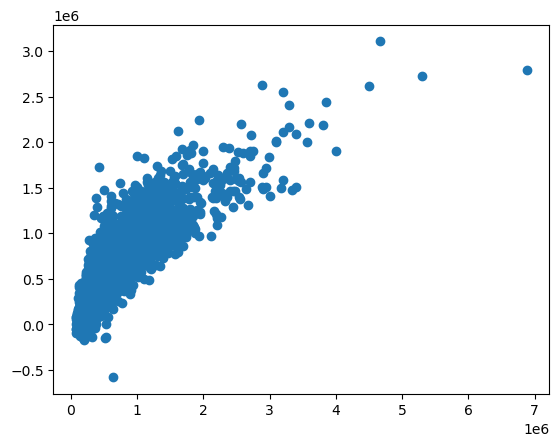

In [23]:
#compare predictions to actual values
plt.scatter(y_test,predictions)

C:\Users\MANANAIR\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


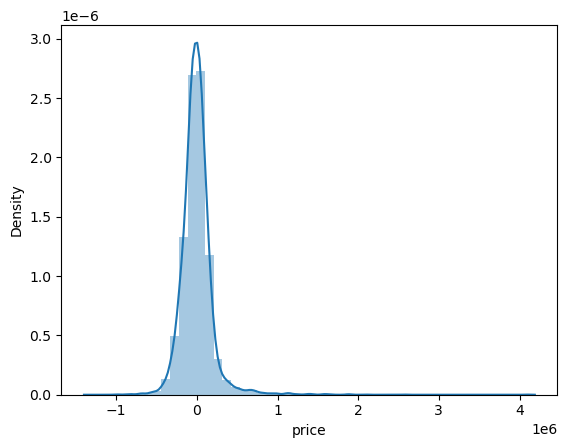

In [24]:
sns.distplot((y_test-predictions),bins=50);

##### STEP 6} Performance Evaluation

In [25]:
from sklearn import metrics

In [26]:
#mean absolute error
print('MAE:', metrics.mean_absolute_error(y_test, predictions))

#mean squared error
print('MSE:', metrics.mean_squared_error(y_test, predictions))

#root mean squared error
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 125977.44042090021
MSE: 39318393443.07047
RMSE: 198288.6619125523


In [27]:
lr_e1 = metrics.mean_absolute_error(y_test, predictions)
lr_e2 = metrics.mean_squared_error(y_test, predictions)
lr_e3 = np.sqrt(metrics.mean_squared_error(y_test, predictions))

In [28]:
%store lr_e1
%store lr_e2
%store lr_e3

Stored 'lr_e1' (float64)
Stored 'lr_e2' (float64)
Stored 'lr_e3' (float64)
